# Example 2
## Load toy Datasets and do some basic statistics
Lets try the diabetes toy dataset from scikit-learn. 

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from sklearn.datasets import load_diabetes
# from sklearn.model_selection import train_test_split
from pprint import pprint
import matplotlib.pyplot as plt
import math

In [3]:
df = load_diabetes(as_frame=True)
df_colms = df.keys()
print(df_colms)
# df_attrb = [getattr(df, x) for x in df_colms]

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
data = df.data
target = df.target
targetNames = df.target_filename
features = df.feature_names
DESCR = df.DESCR
dataModule = df.data_module
filename = df.data_filename
frame = df.frame

In [5]:
frame.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

# The Middle

* Mean: Average $\mu = \sum_{i}^{n} \frac{x_{i}}{n}$
* Median: Middle. There are the same number of records before and after.
* Mode(s): Most common value(s).

In [18]:
print(f'{("Feature" + " "*10)[:11]} Mean   Sum/Size   Median      Mode(s)')
for feature in features:
    colm = data[feature]
    mode = '(' + str(colm.mode())
    mode = mode.replace('\nName', '  Name')[:mode.find("\nName")]
    mode = mode.replace('\n', ') , (') + ')'
    print(f'{(feature+" "*10)[:9]}', end=' | ')
    print(f' {round(colm.mean()* pow(10, 19), 1)}', end='  | ')
    print(f' {round((colm.sum()/colm.size)* pow(10, 19), 1)}', end='   | ')
    print(f' {round(colm.median(), 3)}', end='     | ')
    print(f' {mode}')

Feature     Mean   Sum/Size   Median      Mode(s)
age       |  -2.5  |  -2.5   |  0.005     |  (0    0.016281)
sex       |  123.1  |  123.1   |  -0.045     |  (0   -0.044642)
bmi       |  -2245.6  |  -2245.6   |  -0.007     |  (0   -0.030996) , (1   -0.024529)
bp        |  -479.8  |  -479.8   |  -0.006     |  (0   -0.040099) , (1   -0.005670)
s1        |  -138.1  |  -138.1   |  -0.004     |  (0   -0.037344) , (1   -0.007073)
s2        |  391.8  |  391.8   |  -0.004     |  (0   -0.001001) , (1    0.016222)
s3        |  -57.8  |  -57.8   |  -0.007     |  (0   -0.013948)
s4        |  -90.4  |  -90.4   |  -0.003     |  (0   -0.039493)
s5        |  929.4  |  929.4   |  -0.002     |  (0   -0.018114)
s6        |  113.0  |  113.0   |  -0.001     |  (0    0.003064)


# Variability:

* Range

In [7]:
for feature in features:
    colm = data[feature]
    print(f'{feature}', end='')
    print(f'  Range:[{colm.min()},{colm.max()}]')

age  Range:[-0.1072256316073538,0.11072667545381144]
sex  Range:[-0.044641636506989144,0.05068011873981862]
bmi  Range:[-0.09027529589850945,0.17055522598064407]
bp  Range:[-0.11239880254408448,0.13204361674121307]
s1  Range:[-0.12678066991651324,0.15391371315651542]
s2  Range:[-0.11561306597939897,0.19878798965729408]
s3  Range:[-0.10230705051741597,0.18117906039727852]
s4  Range:[-0.0763945037500033,0.18523444326019867]
s5  Range:[-0.12609712083330468,0.13359728192191356]
s6  Range:[-0.13776722569000302,0.13561183068907107]


* Standard Deviation: $\sigma = \sqrt{\sum_{i}^{n}{\dfrac{(x_{i}-\mu)^{2}}{n-1}}}$

In [8]:
for feature in features:
    colm = data[feature]
    print(f'{feature}', end=' ')
    print(f'  Std:{round(colm.std(),2)}')

age   Std:0.05
sex   Std:0.05
bmi   Std:0.05
bp   Std:0.05
s1   Std:0.05
s2   Std:0.05
s3   Std:0.05
s4   Std:0.05
s5   Std:0.05
s6   Std:0.05


* Draw histograms of features to understand data

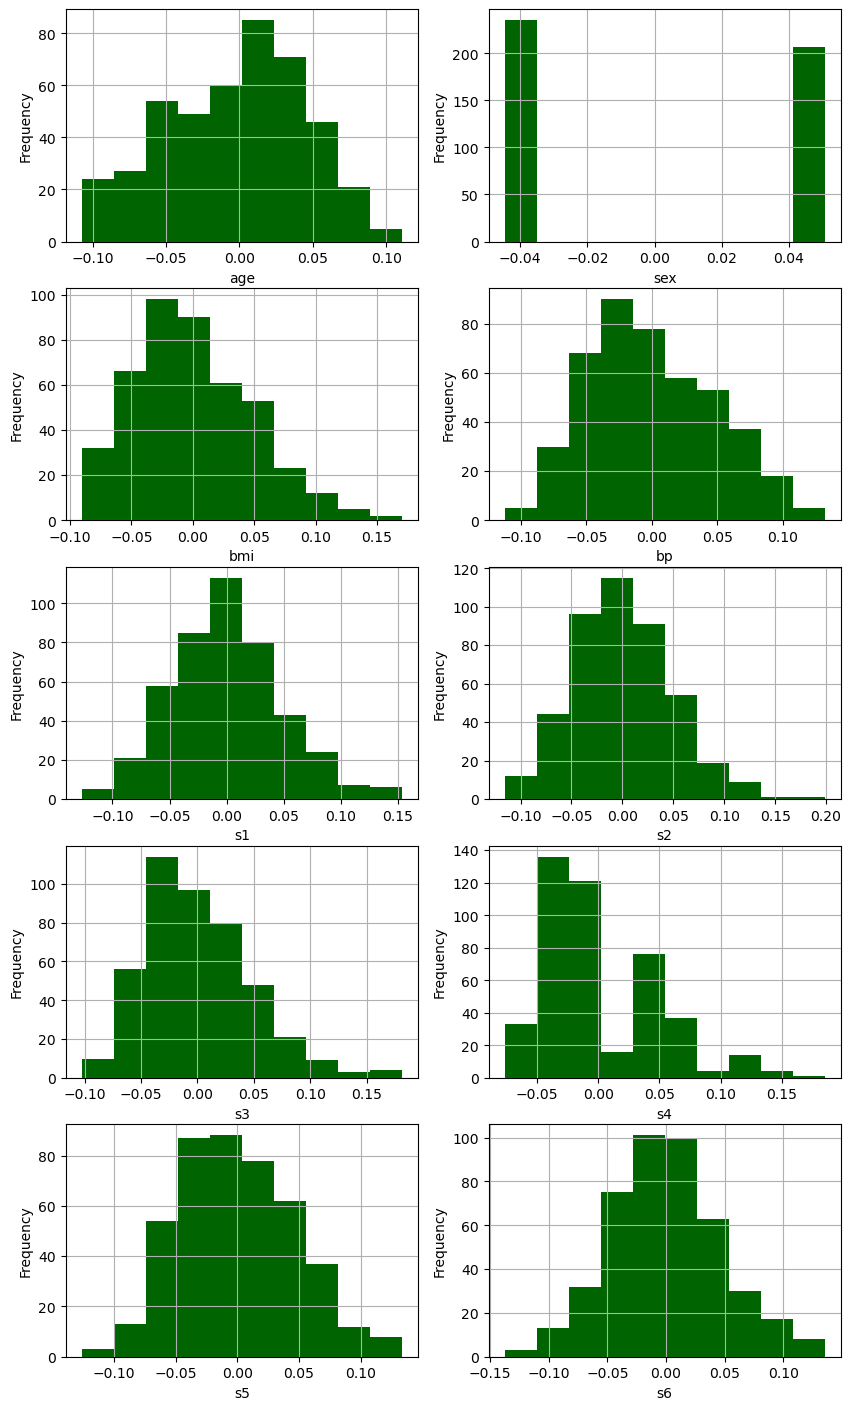

In [9]:
h =[]
nfeatures = len(features)
f = plt.figure(figsize=(10,1.75*nfeatures))
for nth_feat, feature in enumerate(features):
    plt.subplot(int(nfeatures/2),2, 1+nth_feat)
    colm = data[feature]
    hsub = h.append(colm.hist(color='darkGreen'))
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()
plt.close()


* Draw scatter plots of featurees to see correlations

<Figure size 5000x5000 with 0 Axes>

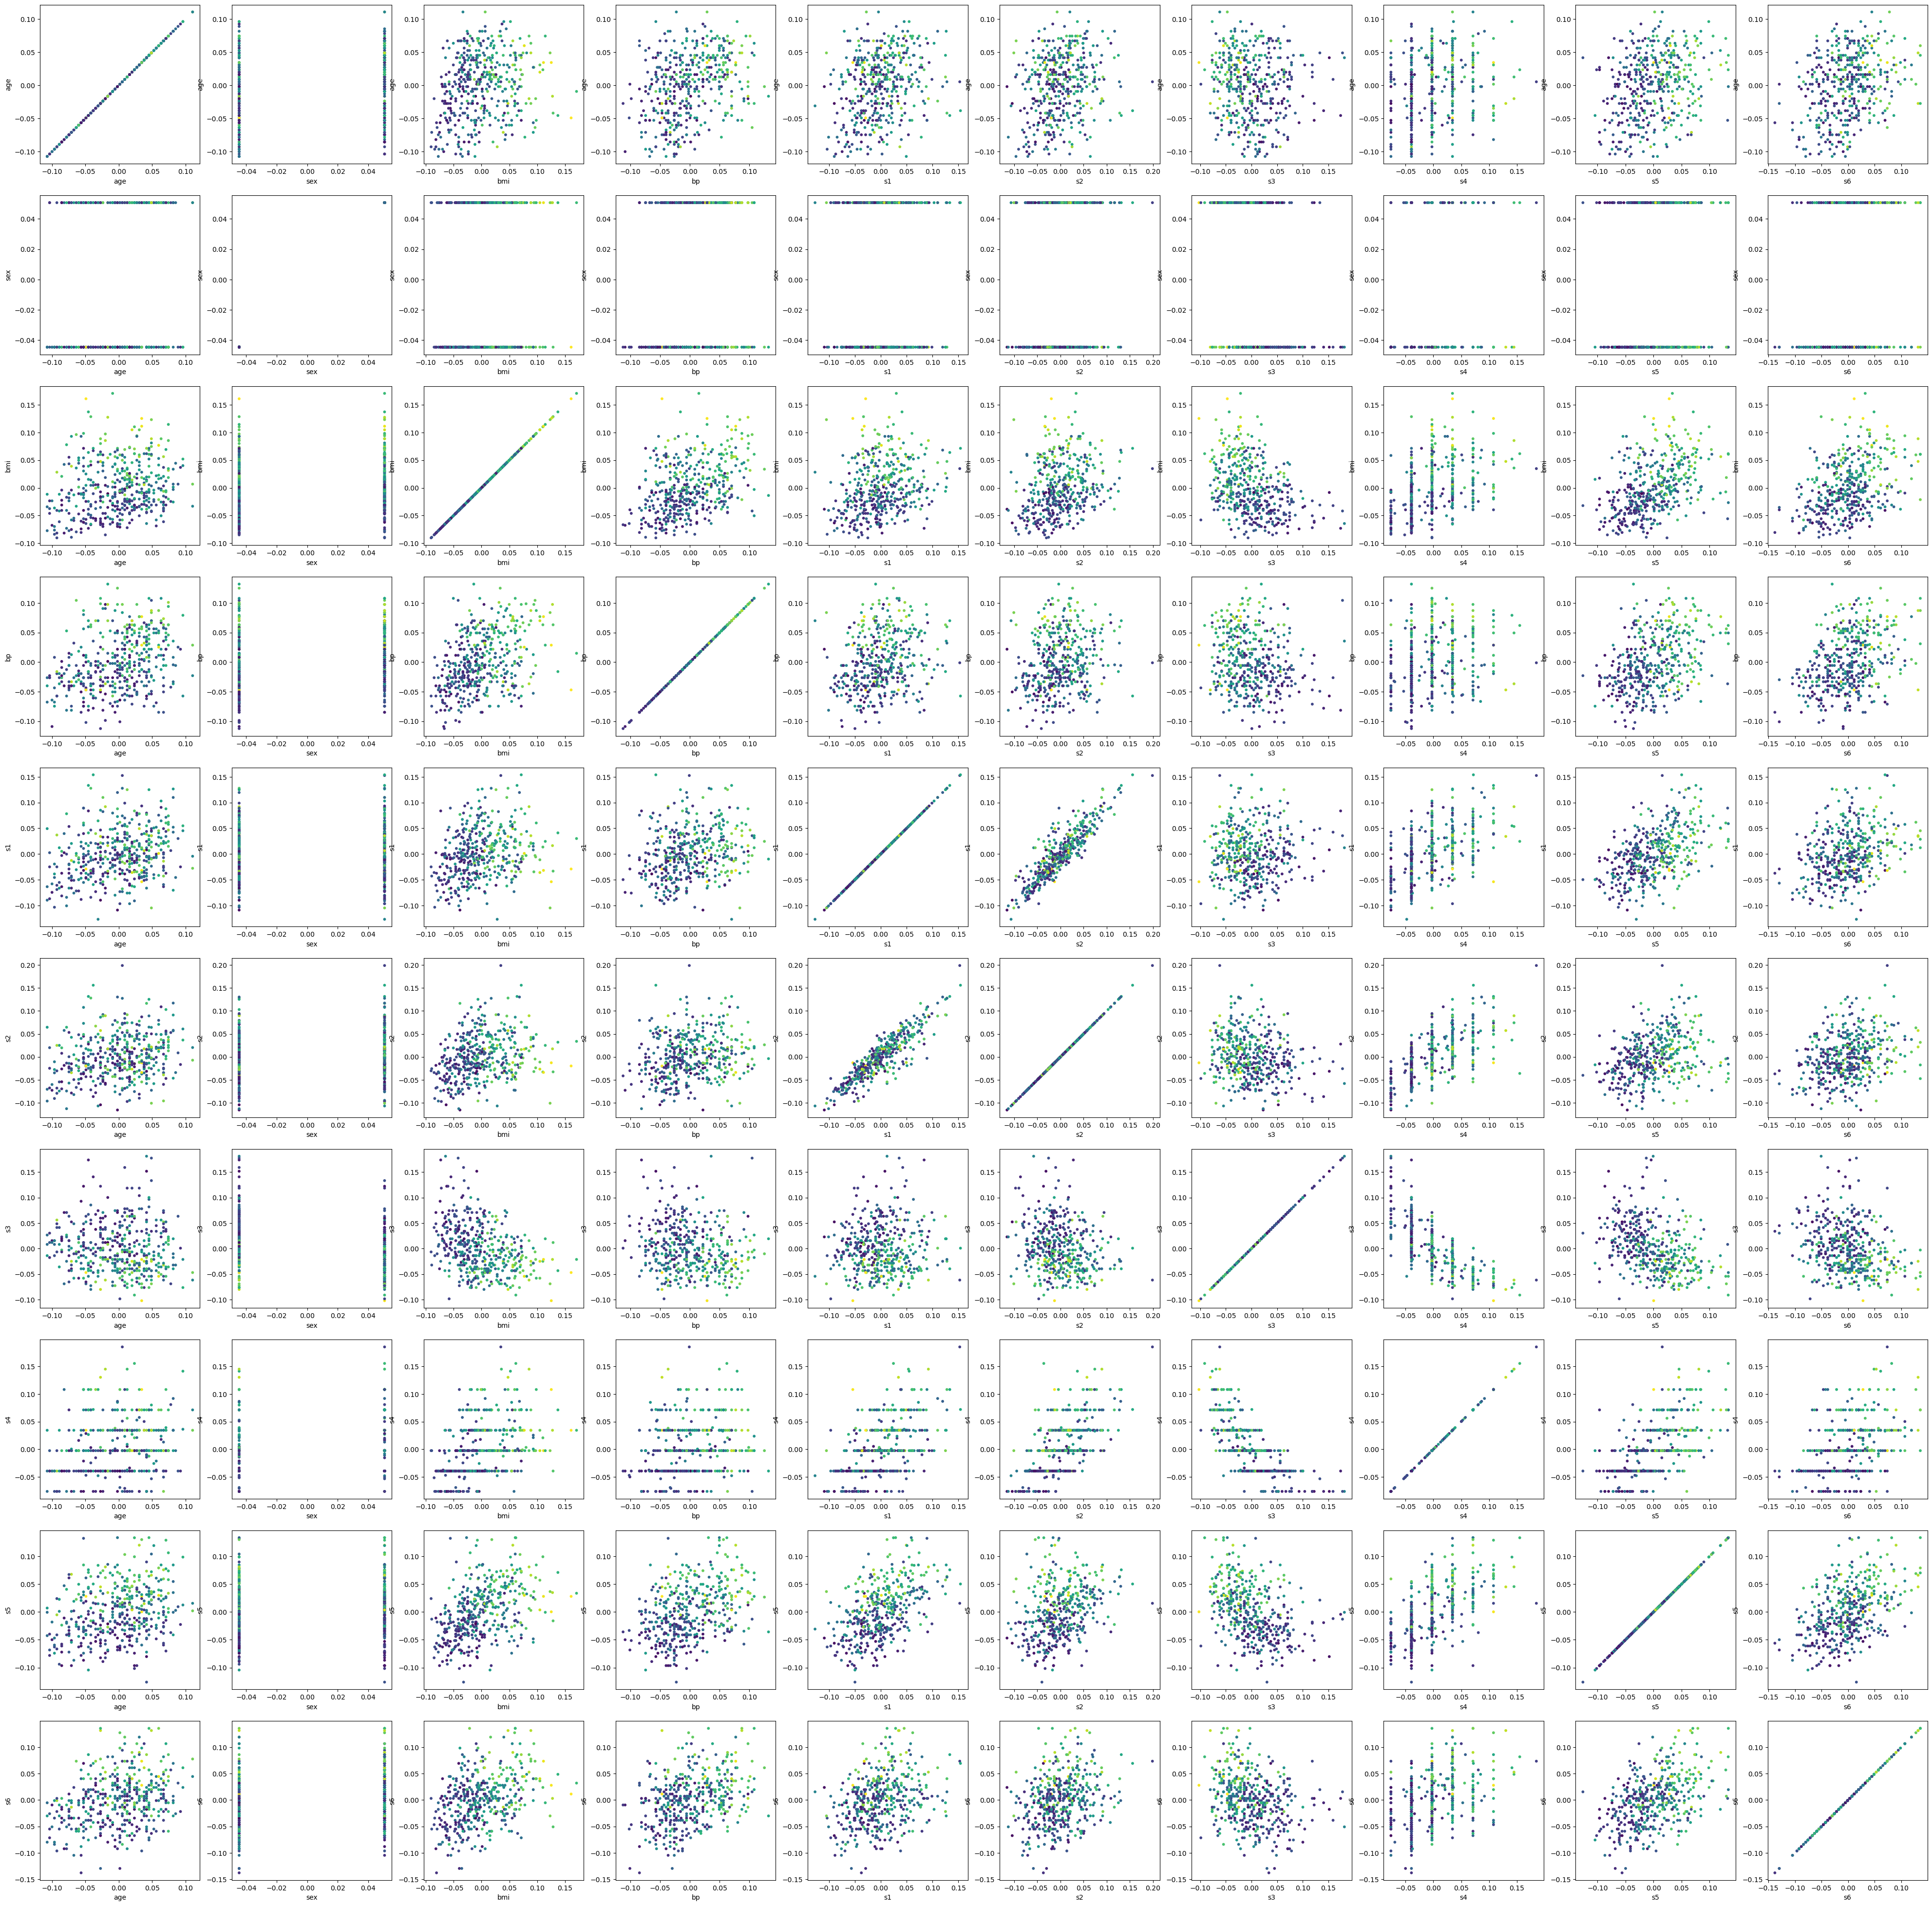

In [10]:
f = plt.figure(figsize=(5*nfeatures,5*nfeatures))
f, axes = plt.subplots(nfeatures, nfeatures, figsize=(5*nfeatures,5*nfeatures))
for nth_featVert, featureVert in enumerate(features):
    for nth_feat, feature in enumerate(features):
        axes[nth_featVert][nth_feat].scatter(x=frame[feature], y=frame[featureVert], c=frame["target"], s=10)
        axes[nth_featVert][nth_feat].set_xlabel(feature)
        axes[nth_featVert][nth_feat].set_ylabel(featureVert)
# plt.tight_layout()
plt.show()
plt.close()